In [1]:
import sys
sys.path.append('../')

In [18]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# trades = pd.read_csv('../data/onetick/raw/AAPL/trades.csv')
trades = feather.read_dataframe('../data/onetick/raw/AAPL/trades.feather')

In [5]:
trades['DateTime'] = pd.to_datetime(trades['Time'])

In [20]:
trades['ones'] = 1
trades['cumsum'] = np.cumsum(trades.ones)

In [22]:
# trades.drop(['Index', 'DISPLAY_IND', 'PRINTABLE', 'CROSS_TYPE', 'DELETED_TIME'], axis=1, inplace=True)

In [40]:
trades.shape[0]

49542364

In [27]:
trades.DateTime.max()

Timestamp('2015-12-31 19:59:50.447000')

In [39]:
trades.shape[0] / (250 * 4 * 24 * 60 * 60)

0.5734069907407408

In [38]:
100 * trades.SIZE.value_counts() / trades.shape[0]

100        44.105306
200         5.434872
1           3.115057
50          3.066727
10          2.120632
300         1.838388
5           1.452254
2           1.341698
20          1.304233
25          1.234620
3           0.960691
400         0.926474
4           0.824214
30          0.789575
6           0.741210
40          0.682414
7           0.658229
15          0.639481
8           0.614648
500         0.602351
75          0.519836
80          0.515670
90          0.508185
99          0.495921
9           0.483766
60          0.479392
12          0.406006
70          0.395258
11          0.394400
13          0.356325
             ...    
9448        0.000002
9455        0.000002
9453        0.000002
9446        0.000002
173238      0.000002
9445        0.000002
9444        0.000002
9478        0.000002
9472        0.000002
9527        0.000002
9509        0.000002
9514        0.000002
9513        0.000002
9512        0.000002
1713774     0.000002
9517        0.000002
9516        0

In [30]:
trades[trades.ORDER_ID == 173560172]

,Time,ORDER_ID,TRADE_ID,BUY_SELL_FLAG,PRICE,SIZE,DateTime,ones,cumsum


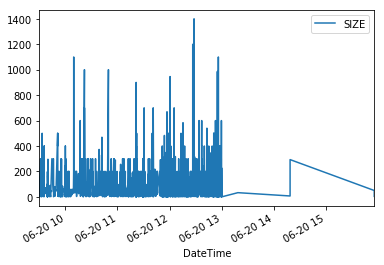

In [57]:
trades[trades.SIZE != 100].plot(x='DateTime', y='SIZE')

In [35]:
ob = pd.read_csv('../data/onetick/cat_ob_5sec.csv')

In [91]:
ob['DateTime'] = pd.to_datetime(ob['Time'])

In [44]:
ob[ob.Time == '2013/06/20 10:30:00.000']

,Index,Symbol,Time,BID_PRICE,BID_UPDATE_TIME,BID_SIZE,ASK_PRICE,ASK_UPDATE_TIME,ASK_SIZE,LEVEL
3595,3596,TVITCH_41::CAT,2013/06/20 10:30:00.000,83.07,2013/06/20 10:29:59.702,200,83.10,2013/06/20 10:29:55.476,200,1
3596,3597,TVITCH_41::CAT,2013/06/20 10:30:00.000,83.06,2013/06/20 10:29:57.894,250,83.11,2013/06/20 10:29:56.537,266,2
3597,3598,TVITCH_41::CAT,2013/06/20 10:30:00.000,83.05,2013/06/20 10:29:53.958,566,83.12,2013/06/20 10:29:58.722,795,3
3598,3599,TVITCH_41::CAT,2013/06/20 10:30:00.000,83.04,2013/06/20 10:29:58.874,1379,83.13,2013/06/20 10:29:54.844,808,4
3599,3600,TVITCH_41::CAT,2013/06/20 10:30:00.000,83.03,2013/06/20 10:29:54.067,666,83.14,2013/06/20 10:29:54.531,366,5


In [104]:
from datetime import timedelta
end_times = ob.DateTime.unique()
start_times = np.roll(times, 1)
start_times[0] = start_times[1] - pd.to_timedelta(timedelta(seconds=5))
print(start_times[0], end_times[0])
print(start_times[1], end_times[1])
print(start_times[-1], end_times[-1])


2013-06-20T09:30:00.000000000 2013-06-20T09:30:05.000000000
2013-06-20T09:30:05.000000000 2013-06-20T09:30:10.000000000
2013-06-20T15:59:55.000000000 2013-06-20T16:00:00.000000000


In [167]:
ob.DateTime.unique()

array(['2013-06-20T09:30:05.000000000', '2013-06-20T09:30:10.000000000',
       '2013-06-20T09:30:15.000000000', ...,
       '2013-06-20T15:59:50.000000000', '2013-06-20T15:59:55.000000000',
       '2013-06-20T16:00:00.000000000'], dtype='datetime64[ns]')

In [165]:
(ob.DateTime.unique()[1] - ob.DateTime.unique()[0]) / np.timedelta64(1, 's')

5.0

In [332]:
import feather
df = feather.read_dataframe('../data/feather_onetick/cat/2013-06-20 12:00:00/trades.feather')

In [333]:
df.shape

(3199, 17)

In [303]:
t_index = pd.date_range(start='2013-06-20 09:30:00', end='2013-06-20 16:00:00', freq='5s')
trade_intervals = iter(trades.resample('6000s', base=0, label='right', on='DateTime'))

pandas.core.resample.DatetimeIndexResampler

In [300]:
for a, b in trades.resample('6000s', base=0, label='right', on='DateTime'):
    print(a)
    print(b)
    break

2013-06-20 10:00:00
             Symbol                     Time   ORDER_ID  TRADE_ID  \
0    TVITCH_41::CAT  2013/06/20 09:30:08.022  173554549   4293173   
1    TVITCH_41::CAT  2013/06/20 09:30:12.211  173595641   4293846   
2    TVITCH_41::CAT  2013/06/20 09:30:13.151  173548844   4294628   
3    TVITCH_41::CAT  2013/06/20 09:30:13.151  173589786   4294629   
4    TVITCH_41::CAT  2013/06/20 09:30:13.153  172759802   4294981   
5    TVITCH_41::CAT  2013/06/20 09:30:13.153  172880040   4294982   
6    TVITCH_41::CAT  2013/06/20 09:30:13.181  173647392   4296032   
7    TVITCH_41::CAT  2013/06/20 09:30:13.184          0   4296113   
8    TVITCH_41::CAT  2013/06/20 09:30:15.330  173693198   4297892   
9    TVITCH_41::CAT  2013/06/20 09:30:15.330          0   4297893   
10   TVITCH_41::CAT  2013/06/20 09:30:19.993          0   4299805   
11   TVITCH_41::CAT  2013/06/20 09:30:33.591  173776519   4301775   
12   TVITCH_41::CAT  2013/06/20 09:30:33.591  173816234   4301776   
13   TVITCH_41

In [296]:
_, trds = next(trade_intervals)

In [297]:
trds

,Symbol,Time,ORDER_ID,TRADE_ID,BUY_SELL_FLAG,MESSAGE_TYPE,TICK_STATUS,PRICE,SIZE,PICOS,OMDSEQ,DateTime
0,TVITCH_41::CAT,2013/06/20 09:30:08.022,173554549,4293173,1,ET,0,83.30,100,291450000,13,2013-06-20 09:30:08.022
1,TVITCH_41::CAT,2013/06/20 09:30:12.211,173595641,4293846,1,ET,0,83.31,100,911029000,270,2013-06-20 09:30:12.211
2,TVITCH_41::CAT,2013/06/20 09:30:13.151,173548844,4294628,1,ET,0,83.32,100,370211000,425,2013-06-20 09:30:13.151
3,TVITCH_41::CAT,2013/06/20 09:30:13.151,173589786,4294629,1,ET,0,83.32,100,370211000,427,2013-06-20 09:30:13.151
4,TVITCH_41::CAT,2013/06/20 09:30:13.153,172759802,4294981,1,ET,0,83.33,100,413140000,391,2013-06-20 09:30:13.153
5,TVITCH_41::CAT,2013/06/20 09:30:13.153,172880040,4294982,1,ET,0,83.33,100,413140000,393,2013-06-20 09:30:13.153
6,TVITCH_41::CAT,2013/06/20 09:30:13.181,173647392,4296032,1,ET,0,83.33,100,66648000,74,2013-06-20 09:30:13.181
7,TVITCH_41::CAT,2013/06/20 09:30:13.184,0,4296113,1,P,0,83.33,3,308822000,306,2013-06-20 09:30:13.184
8,TVITCH_41::CAT,2013/06/20 09:30:15.330,173693198,4297892,0,ET,0,83.33,100,496623000,124,2013-06-20 09:30:15.330
9,TVITCH_41::CAT,2013/06/20 09:30:15.330,0,4297893,0,P,0,83.33,100,496623000,125,2013-06-20 09:30:15.330


In [200]:
(False == trds['BUY_SELL_FLAG']).any()

False

In [231]:
sub_ob = ob[:5]
sub_ob.loc[sub_ob['LEVEL'] == 1, ['BID_SIZE']].values[-1, -1]

400

In [249]:
tick_depth = sub_ob.loc[sub_ob['BID' + '_PRICE'] == 83.28, ['BID_SIZE']].values
tick_depth = 0 if len(tick_depth) == 0 else tick_depth[-1, -1]
tick_depth

0.3019640262458452

In [261]:
is_buy = True
trade_vol_mapping = {}
remaining_trade_volume = trds[trds['BUY_SELL_FLAG'] == is_buy].SIZE.sum() + 1003
for ob_level in sub_ob[['BID_PRICE', 'BID_SIZE']].itertuples():
    trade_volume = min(ob_level.BID_SIZE, remaining_trade_volume)
    remaining_trade_volume -= trade_volume
    trade_vol_mapping[ob_level.BID_PRICE] = trade_volume
trade_vol_mapping

{83.28: 400, 83.27: 165, 83.26: 738, 83.25: 0, 83.24: 0}

In [282]:
if {'a': 1}:
    print('a')

a


In [285]:
list({}.keys())

[]

In [232]:
sub_ob

,Index,Symbol,Time,BID_PRICE,BID_UPDATE_TIME,BID_SIZE,ASK_PRICE,ASK_UPDATE_TIME,ASK_SIZE,LEVEL,DateTime
0,1,TVITCH_41::CAT,2013/06/20 09:30:05.000,83.28,2013/06/20 09:30:01.176,400,83.30,2013/06/20 09:30:04.394,100,1,2013-06-20 09:30:05
1,2,TVITCH_41::CAT,2013/06/20 09:30:05.000,83.27,2013/06/20 09:30:02.648,165,83.31,2013/06/20 09:30:03.292,100,2,2013-06-20 09:30:05
2,3,TVITCH_41::CAT,2013/06/20 09:30:05.000,83.26,2013/06/20 09:30:01.629,791,83.32,2013/06/20 09:30:03.256,292,3,2013-06-20 09:30:05
3,4,TVITCH_41::CAT,2013/06/20 09:30:05.000,83.25,2013/06/20 09:30:00.406,478,83.33,2013/06/20 09:29:58.927,493,4,2013-06-20 09:30:05
4,5,TVITCH_41::CAT,2013/06/20 09:30:05.000,83.24,2013/06/20 09:30:00.874,3365,83.34,2013/06/20 09:30:03.965,406,5,2013-06-20 09:30:05


In [222]:
rel_trds = trds[trds['BUY_SELL_FLAG'] == True].sample(frac=1, replace=False)

for t in rel_trds.itertuples():
    print(t.PRICE)

83.32
83.32
83.32


In [209]:
next(trade_intervals)

(Timestamp('2013-06-20 09:30:40', freq='5S'), Empty DataFrame
 Columns: [Symbol, Time, ORDER_ID, TRADE_ID, BUY_SELL_FLAG, MESSAGE_TYPE, TICK_STATUS, PRICE, SIZE, PICOS, OMDSEQ, DateTime]
 Index: [])

In [74]:
grps = iter(ob.groupby('Time'))

In [89]:
import time
s = time.time()
next(grps)
print(time.time() - s)

0.0005810260772705078


In [168]:
_, a = next(grps)

In [169]:
a

,Index,Symbol,Time,BID_PRICE,BID_UPDATE_TIME,BID_SIZE,ASK_PRICE,ASK_UPDATE_TIME,ASK_SIZE,LEVEL
70,71,TVITCH_41::CAT,2013/06/20 09:31:15.000,83.35,2013/06/20 09:31:05.734,200,83.38,2013/06/20 09:31:09.466,329,1
71,72,TVITCH_41::CAT,2013/06/20 09:31:15.000,83.34,2013/06/20 09:31:05.796,660,83.39,2013/06/20 09:31:05.532,1092,2
72,73,TVITCH_41::CAT,2013/06/20 09:31:15.000,83.33,2013/06/20 09:31:05.643,378,83.40,2013/06/20 09:31:09.466,505,3
73,74,TVITCH_41::CAT,2013/06/20 09:31:15.000,83.32,2013/06/20 09:31:05.040,165,83.41,2013/06/20 09:31:05.444,565,4
74,75,TVITCH_41::CAT,2013/06/20 09:31:15.000,83.31,2013/06/20 09:31:08.993,778,83.42,2013/06/20 09:31:05.054,250,5


In [175]:
if [{}]:
    print('a')

a


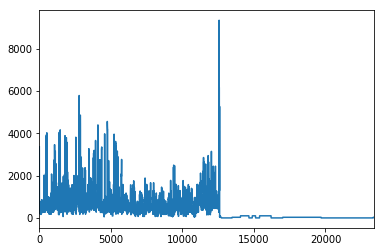

In [51]:
ob[(ob.LEVEL == 5)].BID_SIZE.plot()

In [40]:
ob.BID_PRICE.diff()

0         NaN
1       -0.01
2       -0.01
3       -0.01
4       -0.01
5        0.06
6       -0.01
7       -0.01
8       -0.01
9       -0.01
10       0.07
11      -0.01
12      -0.01
13      -0.01
14      -0.01
15       0.01
16      -0.01
17      -0.01
18      -0.01
19      -0.01
20       0.04
21      -0.01
22      -0.01
23      -0.01
24      -0.01
25       0.04
26      -0.01
27      -0.01
28      -0.01
29      -0.01
         ... 
23370    4.52
23371   -0.08
23372   -0.02
23373   -3.60
23374   -0.82
23375    4.52
23376   -0.08
23377   -0.02
23378   -3.60
23379   -0.82
23380    4.52
23381   -0.08
23382   -0.02
23383   -3.60
23384   -0.82
23385    4.52
23386   -0.08
23387   -0.02
23388   -3.60
23389   -0.82
23390    4.52
23391   -0.08
23392   -0.02
23393   -3.60
23394   -0.82
23395    4.52
23396   -0.08
23397   -0.02
23398   -3.60
23399   -0.82
Name: BID_PRICE, Length: 23400, dtype: float64